# Write a Data Science Blog - Project

This notebook details steps to analyze and interpret statistics from the AirBnb Seattle dataset.
We try to do a data analysis to find vital information out there and using learnt techniques to understand and solve practical questions posed which are benefitial to the organization.


In [257]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sbrn
from collections import defaultdict
import math
%matplotlib inline

# Load and Clean Dataset
In this workspace, we load the Airbnb Seattle files viz. `listing.csv`, `calendar.csv`,`reviews.csv`. 
Then clean the dataset, checking for invalid or missing data.

In [258]:
df_listings = pd.read_csv("./AirbnbSeattleData/listings.csv")

In [259]:
df_calendar = pd.read_csv("./AirbnbSeattleData/calendar.csv")

In [260]:
df_reviews = pd.read_csv("./AirbnbSeattleData/reviews.csv")

In [261]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [262]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [263]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [264]:
# We check the missing values among the columns in listings dataframe
df_listings.isnull().sum().sort_values(ascending=False)

license             3818
square_feet         3721
monthly_price       2301
security_deposit    1952
weekly_price        1809
                    ... 
accommodates           0
bed_type               0
amenities              0
price                  0
id                     0
Length: 92, dtype: int64

In [265]:
# Check for columns having no missing value with each being unique value
df_listings.nunique()[df_listings.nunique() == len(df_listings)]

id             3818
listing_url    3818
picture_url    3818
latitude       3818
longitude      3818
dtype: int64

# Data Wrangling / Modelling 

For any vacation planner, very first question propping up in mind is what are the facilities in our accommodation.
Observing the dataset, we see amenities column detailing out the features of the listing. 
I would like to know what are the most common amenities available in Seattle Airbnb dataset viz. 
### Question-1 What are the most common amenities?

In [266]:
# We analyse the Amenities columnar data
df_listings['amenities'][0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

###### The code below will find the number of listings with amenities in the list of amenities

In [267]:
# Trying out on 'Amenities' column data to convert to string list 

re.sub(r"\"","",df_listings['amenities'][0].strip('\'\{\}')).split(",")

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [268]:
# Find list of all available Amenties

list_of_amenities = []

for i in range(len(df_listings)):
    if df_listings['amenities'][i] != '':
        list_of_amenities.extend(re.sub(r"\"","",df_listings['amenities'][i].strip('\'\{\}')).split(","))
        
list_of_amenities

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'TV',
 'Internet',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Buzzer/Wireless Intercom',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'First Aid Kit',
 'Safety Card',
 'Fire Extinguisher',
 'Essentials',
 'TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Free Parking on Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Dog(s)',
 'Cat(s)',
 'Hot Tub',
 'Indoor Fireplace',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'Essentials',
 'Shampoo',
 'Internet',
 'Wireless Internet',
 'Kitchen',
 'Indoor Fireplace',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'Safety Card',
 'Fire Extinguisher',
 'Es

In [269]:
# Remove duplicates from the Amenities list
list_of_amenities = list(set(list_of_amenities))
list_of_amenities

['',
 'Dryer',
 'Breakfast',
 'Smoke Detector',
 'Essentials',
 'Hangers',
 'Suitable for Events',
 'Doorman',
 'Smoking Allowed',
 'Carbon Monoxide Detector',
 'Buzzer/Wireless Intercom',
 'Gym',
 'Fire Extinguisher',
 'First Aid Kit',
 'Indoor Fireplace',
 'Family/Kid Friendly',
 'Heating',
 'Pets live on this property',
 'Elevator in Building',
 'Wheelchair Accessible',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Internet',
 'Laptop Friendly Workspace',
 'Washer / Dryer',
 'Kitchen',
 'Shampoo',
 'Hair Dryer',
 'Wireless Internet',
 'Iron',
 'Dog(s)',
 'TV',
 'Pool',
 'Safety Card',
 'Cable TV',
 'Cat(s)',
 'Free Parking on Premises',
 'Washer',
 'Hot Tub',
 '24-Hour Check-in',
 'Air Conditioning',
 'Pets Allowed']

In [270]:
# Using list comprehension, we drop empty string value

list_of_amenities = [x for x in list_of_amenities if x]
list_of_amenities

['Dryer',
 'Breakfast',
 'Smoke Detector',
 'Essentials',
 'Hangers',
 'Suitable for Events',
 'Doorman',
 'Smoking Allowed',
 'Carbon Monoxide Detector',
 'Buzzer/Wireless Intercom',
 'Gym',
 'Fire Extinguisher',
 'First Aid Kit',
 'Indoor Fireplace',
 'Family/Kid Friendly',
 'Heating',
 'Pets live on this property',
 'Elevator in Building',
 'Wheelchair Accessible',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Internet',
 'Laptop Friendly Workspace',
 'Washer / Dryer',
 'Kitchen',
 'Shampoo',
 'Hair Dryer',
 'Wireless Internet',
 'Iron',
 'Dog(s)',
 'TV',
 'Pool',
 'Safety Card',
 'Cable TV',
 'Cat(s)',
 'Free Parking on Premises',
 'Washer',
 'Hot Tub',
 '24-Hour Check-in',
 'Air Conditioning',
 'Pets Allowed']

In [271]:
# The function counts the number of occurence of a feature 
# within dataframe column as compared with fixed list of features. 

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

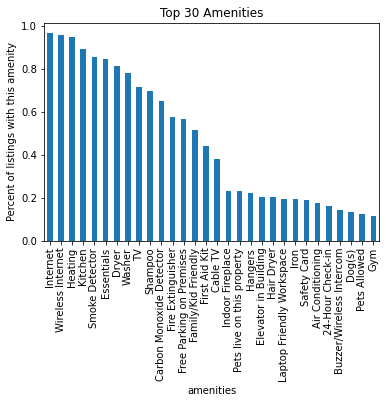

In [272]:
# Lookup dataframe which has lists of amenities and count of these amenities lists in df_listings
lookup = df_listings['amenities'].value_counts().reset_index()
lookup.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

# Calling total_count function to count the number of listings that contains each amenity in the amenities list.
df_lookup = total_count(lookup, 'amenities', 'count', list_of_amenities)
df_lookup.set_index('amenities', inplace=True)

# Visualize percentage of each amenity from the most common to the least common.
(df_lookup/len(df_listings))[:30].plot(kind='bar', legend=None, subplots=True);
plt.title('Top 30 Amenities');
plt.ylabel('Percent of listings with this amenity')
plt.show()

In the above chart we notice most common amenities in Seattle listings are:

+ Internet
+ Wireless Internet
+ Heating
+ Kitchen
+ Smoke Detector

Whereas the least common amenities in Seattle listings are:

+ Air Conditioner
+ 24 hour checkin
+ Wireless Intercom
+ Dog(s) / pet(s)
+ Gym

Noticed some of these features have seperate columns (for example property_type or room_type) and some of these features are in amenities column.
### Question-2 What are the prominent features contributing to highly rented properties?

To find the most popular rented property we will check against its availability for next 30 days which would be the less compared to the ones not so popular among booking rates.

##### First we onset with some rudimentary data explorations as below

In [273]:
# Check all columns for any missing values 
df_listings.isnull().mean()[:50]

id                              0.000000
listing_url                     0.000000
scrape_id                       0.000000
last_scraped                    0.000000
name                            0.000000
summary                         0.046359
space                           0.149031
description                     0.000000
experiences_offered             0.000000
neighborhood_overview           0.270299
notes                           0.420639
transit                         0.244631
thumbnail_url                   0.083814
medium_url                      0.083814
picture_url                     0.000000
xl_picture_url                  0.083814
host_id                         0.000000
host_url                        0.000000
host_name                       0.000524
host_since                      0.000524
host_location                   0.002095
host_about                      0.224987
host_response_time              0.136983
host_response_rate              0.136983
host_acceptance_

In [274]:
df_listings.isnull().mean()[50:]

accommodates                        0.000000
bathrooms                           0.004191
bedrooms                            0.001572
beds                                0.000262
bed_type                            0.000000
amenities                           0.000000
square_feet                         0.974594
price                               0.000000
weekly_price                        0.473808
monthly_price                       0.602672
security_deposit                    0.511262
cleaning_fee                        0.269775
guests_included                     0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
calendar_updated                    0.000000
has_availability                    0.000000
availability_30                     0.000000
availability_60                     0.000000
availability_90                     0.000000
availability_365                    0.000000
calendar_l

We observe that the columns: Room_Type, Availability_30, Price does not have any missing values, can be used for our analysis. As this is a firm indicator and source of truth with popularity of any listings.

##### Analysing the 'room types': 

In [275]:
# Check for the room types 
df_listings.groupby(['room_type']).agg({'id':'count'})

,id
room_type,
Entire home/apt,2541
Private room,1160
Shared room,117


We can find the booking ratio for 30 days showing popularity trend.

In [276]:
#Below code shows information about booking rate of different room types for next 30 days
df_listings['bookingRate_30'] = 1 - (df_listings['availability_30']/30)
df_listings['bookingRate_30'].head()

0    0.533333
1    0.566667
2    0.966667
3    1.000000
4    0.000000
Name: bookingRate_30, dtype: float64

In [277]:
# Comparing booking rates for different room types for next 30 days
df_listings.groupby(['room_type'])['bookingRate_30'].mean().sort_values(ascending=False)


room_type
Entire home/apt    0.483353
Private room       0.362759
Shared room        0.279202
Name: bookingRate_30, dtype: float64

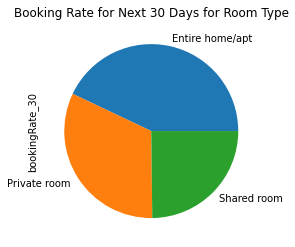

In [278]:
# Visualize booking rate trends with different room types for next 30 days
(df_listings.groupby(['room_type'])['bookingRate_30'].mean().sort_values(ascending=False)).plot(kind='pie')
plt.title('Booking Rate for Next 30 Days for Room Type');
plt.show()

We can infer that the 'Entire Home/apt' is the most popular rented category amongst all the room types.

##### Analysing the 'property types' :  

In [280]:
# Check the Property Type available
df_listings.groupby(['property_type']).agg({'id':'count'})

,id
property_type,
Apartment,1708
Bed & Breakfast,37
Boat,8
Bungalow,13
Cabin,21
Camper/RV,13
Chalet,2
Condominium,91
Dorm,2


In [281]:
# Comparing booking rates for above different property types for next 30 days
df_listings.groupby(['property_type'])['bookingRate_30'].mean().sort_values(ascending=False)


property_type
Tent               0.800000
Dorm               0.666667
Treehouse          0.666667
Chalet             0.500000
Cabin              0.469841
Apartment          0.456011
Condominium        0.454579
Loft               0.435000
House              0.432583
Townhouse          0.413559
Camper/RV          0.410256
Other              0.301515
Bed & Breakfast    0.257658
Boat               0.250000
Bungalow           0.215385
Yurt               0.066667
Name: bookingRate_30, dtype: float64

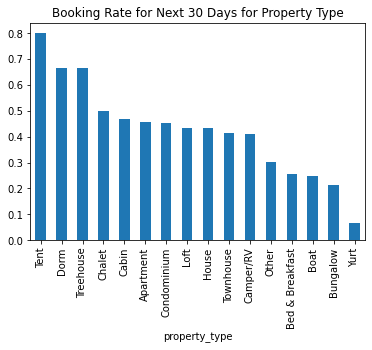

In [282]:
# Visualize booking rate trends of different property types for next 30 days
(df_listings.groupby(['property_type'])['bookingRate_30'].mean().sort_values(ascending=False)).plot(kind='bar')
plt.title('Booking Rate for Next 30 Days for Property Type');
plt.show()

Now we can analyze prominent amenities linked with  above highly booked properties. 

In [283]:
#Check if amenities column has an missing values.
df_listings['amenities'].isnull().sum()

0

In [284]:
# Append new columns for each of the amenities and fill them all with zeros.
for i in range(len(list_of_amenities)):
    df_listings[list_of_amenities[i]] = 0

In [285]:
# We will fill each row's new specific amenities columns with 1 when that Amenity is present in 'amentiies' column otherwise 0 value is input.

for i in range(len(list_of_amenities)):
    for j in range(len(df_listings)):
        if list_of_amenities[i] in df_listings['amenities'][j]:
            df_listings.loc[j , list_of_amenities[i]] = 1
        else:
            df_listings.loc[j , list_of_amenities[i]] = 0

In [286]:
# Create a dataframe with booking rates of listings that contain the amenity.
amenities = pd.DataFrame(index=range(0,len(list_of_amenities)), columns = ["Amenity", "Booking Rate with Amenity", "Booking Rate without Amenity", "Booking Rate Difference"])

# For each Amenity we will include columns each for booking rate of listings with/without amenitiy, 
# along with a column containing their difference.

for i in range(len(list_of_amenities)):
    amenities['Amenity'][i] = list_of_amenities[i]
    amenities['Booking Rate with Amenity'][i] = df_listings.groupby([list_of_amenities[i]])['bookingRate_30'].mean()[1]
    amenities['Booking Rate without Amenity'][i] = df_listings.groupby([list_of_amenities[i]])['bookingRate_30'].mean()[0]
    amenities['Booking Rate Difference'][i] = amenities['Booking Rate with Amenity'][i] - amenities['Booking Rate without Amenity'][i]

amenities.set_index('Amenity', inplace=True)

In [287]:
# We list Top 10 booking rate difference to see which amenities were least prefered by guests.
amenities.sort_values(by='Booking Rate Difference', ascending = False)[:10]


,Booking Rate with Amenity,Booking Rate without Amenity,Booking Rate Difference
Amenity,,,
Washer / Dryer,0.616667,0.440365,0.176302
Kitchen,0.451154,0.347764,0.10339
Cat(s),0.486649,0.435322,0.0513271
Pets Allowed,0.47959,0.434937,0.0446532
Other pet(s),0.48366,0.439873,0.0437876
Dryer,0.448523,0.404782,0.0437406
Washer,0.449543,0.407546,0.0419968
Smoke Detector,0.445992,0.406642,0.0393502
Pets live on this property,0.464477,0.433231,0.031246


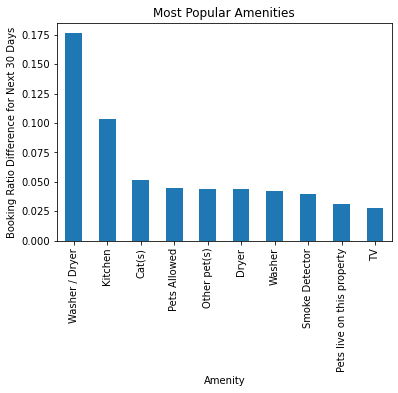

In [288]:
# Lets visualize most prominent and preferred amenities as per booking rates.
amenities['Booking Rate Difference'].sort_values(ascending = False)[:10].plot(kind='bar', legend=None)
plt.title('Most Popular Amenities');
plt.ylabel('Booking Ratio Difference for Next 30 Days')
plt.show()

In [289]:
# We list Top 10 booking rate difference to see which amenities were least prefered by guests.
amenities.sort_values(by='Booking Rate Difference', ascending = True)[:10]


,Booking Rate with Amenity,Booking Rate without Amenity,Booking Rate Difference
Amenity,,,
Pool,0.332495,0.445149,-0.112654
Breakfast,0.367239,0.446498,-0.079259
Doorman,0.364314,0.442191,-0.0778775
Suitable for Events,0.377831,0.444084,-0.0662533
Hot Tub,0.381628,0.445529,-0.0639005
Iron,0.39681,0.450986,-0.0541757
Hair Dryer,0.40056,0.450602,-0.0500424
Lock on Bedroom Door,0.394667,0.441689,-0.0470224
Hangers,0.405122,0.450516,-0.0453938


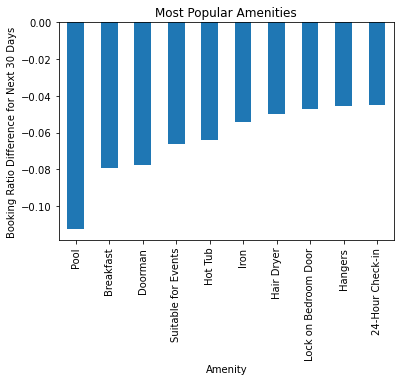

In [290]:
# Lets visualize least prominent and neglected amenities as per booking rates.
amenities['Booking Rate Difference'].sort_values(ascending = True)[:10].plot(kind='bar', legend=None)
plt.title('Most Popular Amenities');
plt.ylabel('Booking Ratio Difference for Next 30 Days')
plt.show()

Holiday goers prefer "Entire home/apt" more than 12% than a "private room" or a "shared room".

We can summarize and conclude that the properties with Washer/Dryer increases the booking rate for next 30 days more than 17%. Kitchen and pets friendly rentals are most popular among vacationers.

On the contrary, a swimming pool or breakfast-included rooms are not useful amenities in high rated rental properties.

### Question 3. How much price differs with the distance from city center / downtown? 
Tourists and travellers often seek accomodation with proximity to sight seeing places. In this aspect one often looks for downtown and city center places which ensures less travel time to places of Interest. 

To tackle this problem we write a function to ascertain distance from downtown for each listing. According to Google Maps the coordinates of Seattle downtown are [47.605151, -122.334379].

But first we need to prepare data model for applying Linear Regression to see impact of distance from downtown on price.

In [291]:
# To resolve this problem we need geo spatial location information and price of listings as below
features_of_interest = ['latitude', 'longitude', 'price']
df_listings_ml = df_listings[features_of_interest]

In [292]:
# Display the relevant data 
df_listings_ml

,latitude,longitude,price
0,47.636289,-122.371025,$85.00
1,47.639123,-122.365666,$150.00
2,47.629724,-122.369483,$975.00
3,47.638473,-122.369279,$100.00
4,47.632918,-122.372471,$450.00
...,...,...,...
3813,47.664295,-122.359170,$359.00
3814,47.649552,-122.318309,$79.00
3815,47.508453,-122.240607,$93.00
3816,47.632335,-122.275530,$99.00


In [293]:
# Function to calculate distance from the downtown assuming its geospatial co-ordinates are given.
def distance_from_downtown(lat, lon, downtown=[47.605151, -122.334379]):
    '''
    INPUT:
    lat is the latitude of the point that I will calculate distance.
    lon is the longitude of the point that I will calculate distance.
    downtown is the coordinate of Seattle Downtown according to Google Maps. Downtown variable can be different, if the
    distance is expected to be calculated from a different point.
    
    OUTPUT:
    Distance between the point and the downtown.
    '''   
    R = 6373.0
    lat1 = math.radians(downtown[0])
    lon1 = math.radians(downtown[1])
    lat2 = math.radians(lat)
    lon2 = math.radians(lon)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [294]:
# We create neww column 'distance_from_downtown' which has the information of distance of listing from downtown. 

for i in range(len(df_listings_ml)):
    df_listings_ml.loc[i, 'distance_from_downtown'] = distance_from_downtown(df_listings_ml.loc[i, 'latitude'], df_listings_ml.loc[i, 'longitude'])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [295]:
df_listings_ml

,latitude,longitude,price,distance_from_downtown
0,47.636289,-122.371025,$85.00,4.420891
1,47.639123,-122.365666,$150.00,4.447553
2,47.629724,-122.369483,$975.00,3.794508
3,47.638473,-122.369279,$100.00,4.536924
4,47.632918,-122.372471,$450.00,4.206609
...,...,...,...,...
3813,47.664295,-122.359170,$359.00,6.835929
3814,47.649552,-122.318309,$79.00,5.083482
3815,47.508453,-122.240607,$93.00,12.854254
3816,47.632335,-122.275530,$99.00,5.348853


In [296]:
# We may now delete 'latitude', 'longitude' columns since we need only difference which is captured in new column.
df_listings_ml = df_listings_ml.drop(columns=['latitude', 'longitude'])


In [297]:
df_listings_ml

,price,distance_from_downtown
0,$85.00,4.420891
1,$150.00,4.447553
2,$975.00,3.794508
3,$100.00,4.536924
4,$450.00,4.206609
...,...,...
3813,$359.00,6.835929
3814,$79.00,5.083482
3815,$93.00,12.854254
3816,$99.00,5.348853


#### Convert the 'price' string valued column to enable our calculations

In [298]:
# Inspect 'price' column values
df_listings_ml['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [299]:
# Check for any missing values
df_listings_ml['price'].isnull().sum()

0

In [300]:
# View the dataframe 
df_listings_ml.head()

,price,distance_from_downtown
0,$85.00,4.420891
1,$150.00,4.447553
2,$975.00,3.794508
3,$100.00,4.536924
4,$450.00,4.206609


In [301]:
# Clean column 'price' by removing the $ signs and (comma) signs. 
df_listings_ml['price'] = df_listings_ml['price'].str.replace('$', '')
df_listings_ml['price'] = df_listings_ml['price'].str.replace(',', '')

# Removing $ and , signs made 0 (zero) values NaN again. So I have to fillna with 0 again. 
df_listings_ml['price'].fillna(0, inplace=True)

# Changing data type from string to float.
df_listings_ml['price'] = df_listings_ml['price'].astype(float)

In [302]:
# View the dataframe
df_listings_ml.head()

,price,distance_from_downtown
0,85.0,4.420891
1,150.0,4.447553
2,975.0,3.794508
3,100.0,4.536924
4,450.0,4.206609


Creating regression model with distance from downtown variable.

In [303]:
# Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_listings_ml['price']
X = df_listings_ml.drop(columns='price')

In [304]:
# Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=35)

In [305]:
# Applying the linear regression, fitting the model, making predictions with the test set and scoring the success of the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.01737221903237718


In [306]:
# Referred from Udacity material, the below function helps us to find model's linear coefficients. 

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df



In [307]:
# We can use the above function find the coefficients of the new model.
coef_df = coef_weights(lm_model.coef_, X_train)

In [308]:
#I print the coefficient of 'distance_from_downtown' variable
coef_df[coef_df['est_int'] == 'distance_from_downtown']

,est_int,coefs,abs_coefs
0,distance_from_downtown,-4.068903,4.068903


As observed the 'distance_from_downtown' feature is inversely proportional to price. Consequently the staying far from downtown decreases rental rates. For an additional kilometer distance away from downtown would rather decrease cost further by approximately USD 4 for the stay.

So one might save on accomodation bookings away from city center at the stake of lower reach to tourist centers or places of interest closer to heart of the city.